# Paquetes

In [1]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse
import tldextract

# Datasets

## Datasets Valids

Usando los datasets obtenidos y generamos podemos unirlos para generar un dataset completo para la detección de phishing.

In [2]:
data_phish_valid1 = pd.read_csv('Datasets/verified_online.csv')
data_phish_valid1['phishing'] = np.ones(data_phish_valid1.shape[0])
data_phish_valid1 = data_phish_valid1[['url','phishing']]
data_phish_valid1

,url,phishing
0,http://populaire-pro-dsp.com/PopIbet/app.html,1.0
1,https://talkingtree.staging-technologies.com/v...,1.0
2,https://yahoopdf.yolasite.com/,1.0
3,https://www4.sndc-crad-nem-inedx.scottfaraday1.cn,1.0
4,https://annzon-ihbsf-co-jp.mbhcxy.buzz/,1.0
...,...,...
11102,http://gkjx168.com/images,1.0
11103,http://www.habbocreditosparati.blogspot.com/,1.0
11104,http://creditiperhabbogratissicuro100.blogspot...,1.0
11105,http://mundovirtualhabbo.blogspot.com/2009_01_...,1.0


In [3]:
data_phish_valid.iloc[60:80]

NameError: name 'data_phish_valid' is not defined

In [4]:
data_phish_valid2 = pd.read_csv('Datasets/Dataset_Phishing_Valid.csv')
data_phish_valid2['phishing'] = np.ones(data_phish_valid2.shape[0])
data_phish_valid2 = data_phish_valid2[['URL','phishing']]
data_phish_valid2.columns = ['url', 'phishing']
data_phish_valid2

,url,phishing
0,https://fb.help-sync10.ga/,1.0
1,https://xefcxersewadxfrdea12wa.000webhostapp.c...,1.0
2,http://protectyouraccount.fromamazoncardupdate...,1.0
3,http://srnbc.nrcktoa.cn/,1.0
4,http://srnbc.zunflbo.cn/,1.0
...,...,...
19995,https://rakuten.email-cecile5.net/l,1.0
19996,https://rakuten.email-cecile3.net/l,1.0
19997,https://aionmrn.serveirc.com/,1.0
19998,https://aiolinorm.serveirc.com/,1.0


## Dataset Top Webs

In [5]:
data_top_urls = pd.read_csv('Datasets/Dataset_Top_urls.csv')
data_top_urls = data_top_urls.iloc[:5000]
data_top_urls['phishing'] = np.zeros(data_top_urls.shape[0])
data_top_urls = data_top_urls[['URL','phishing']]
data_top_urls.columns = ['url', 'phishing']
data_top_urls

,url,phishing
0,google.com,0.0
1,youtube.com,0.0
2,facebook.com,0.0
3,baidu.com,0.0
4,wikipedia.org,0.0
...,...,...
4995,uspto.gov,0.0
4996,elastic.co,0.0
4997,vkmag.com,0.0
4998,mtime.com,0.0


Podríamos comparar dominios correctos usando estos top urls contra los dominios de los urls analizados.

In [6]:
data_top_urls['domain'] = data_top_urls['url'].apply(lambda x: tldextract.extract(x).domain)
#data_top_urls['subdomain'] = data_top_urls['url'].apply(lambda x: tldextract.extract(x).subdomain)
data_top_urls.iloc[70:90]

,url,phishing,domain
70,paypal.com,0.0,paypal
71,microsoftonline.com,0.0,microsoftonline
72,google.com.tw,0.0,google
73,google.com.au,0.0,google
74,whatsapp.com,0.0,whatsapp
75,google.pl,0.0,google
76,xhamster.com,0.0,xhamster
77,detail.tmall.com,0.0,tmall
78,diply.com,0.0,diply
79,google.co.id,0.0,google


## Dataset Invalid

In [7]:
data_phish_invalid = pd.read_csv('Datasets/Dataset_Phishing_Invalid.csv')
data_phish_invalid['phishing'] = np.zeros(data_phish_invalid.shape[0])
data_phish_invalid = data_phish_invalid[['URL','phishing']]
data_phish_invalid.columns = ['url', 'phishing']
data_phish_invalid

,url,phishing
0,https://www.paysafecard.com/fr-ch/,0.0
1,https://cncs.gob.do,0.0
2,https://eticket.migracion.gob.do/,0.0
3,https://www.indeed.com/legal?hl=en_US#tos,0.0
4,https://www.peoplemetrics.com/,0.0
...,...,...
28215,http://searchengineland.com/mapquest-reboot-ne...,0.0
28216,http://feeds.searchengineland.com/~r/searcheng...,0.0
28217,http://www.seroundtable.com/photos/google-ligh...,0.0
28218,http://feeds.seroundtable.com/~r/SearchEngineR...,0.0


## Generación del Dataset

Generamos el dataset completo y mezclamos las observaciones.

In [8]:
# Pruebo sin incluir top_urls
data = pd.concat([data_phish_invalid, data_phish_valid1, data_phish_valid2])
data = data.sample(frac=1, random_state = 42).reset_index(drop=True)
#data.to_csv('Dataset.csv')
data.head(10)

,url,phishing
0,http://3.82.83.31/inter/projet/open/,1.0
1,https://www.musicreadingsavant.com/musicgiftsg...,1.0
2,http://click.email.thinkgeek.com/profile_cente...,0.0
3,https://99conferences.com/privacy_policy,0.0
4,https://www.amazon-jp.paypewqa.club/404.html,1.0
5,https://yamaxunlgkjeyuwflkdshg.xyz/mobile/,1.0
6,http://tempuri.org/:MATERBLOB_SearchResult,0.0
7,https://6e33r.codesandbox.io/,1.0
8,https://www.whatsappchatnow2021fgg.duckdns.org/,1.0
9,https://docamo.ne.ieqh.xyz,1.0


In [9]:
data['phishing'].value_counts()

1.0    31107
0.0    28220
Name: phishing, dtype: int64

# Descomposición del URL

## Variable Scheme

Los 5000 urls obtenidos de alexa no tienen esta porción. Estos links podrían introducir sesgos en el análisis. Podemos analizar estos links que tienen 'spam' como scheme, pero en principio son observaciones que no se incluirían.

In [10]:
data['scheme'] = data['url'].apply(lambda x: urlparse(x).scheme)

In [11]:
# Eliminamos observaciones con scheme diferente a http y https.
data = data.query('scheme in ["http", "https"]')

In [12]:
data['scheme'].value_counts()

http     30994
https    28319
Name: scheme, dtype: int64

In [13]:
pd.crosstab(index = data['phishing'], columns = data['scheme'])

scheme,http,https
phishing,,
0.0,19615,8591
1.0,11379,19728


## Variable Domain

Extraemos el dominio completo de los urls analizados.

In [14]:
data['domain_complete'] = data['url'].apply(lambda x: urlparse(x).netloc)

Hay dos urls que no parecerían tener dominio.

In [15]:
print((data['domain_complete'] == '').sum())
data = data.query('domain_complete != ""')

2


In [16]:
data.head()

,url,phishing,scheme,domain_complete
0,http://3.82.83.31/inter/projet/open/,1.0,http,3.82.83.31
1,https://www.musicreadingsavant.com/musicgiftsg...,1.0,https,www.musicreadingsavant.com
2,http://click.email.thinkgeek.com/profile_cente...,0.0,http,click.email.thinkgeek.com
3,https://99conferences.com/privacy_policy,0.0,https,99conferences.com
4,https://www.amazon-jp.paypewqa.club/404.html,1.0,https,www.amazon-jp.paypewqa.club


In [17]:
data['domain_complete']

0                         3.82.83.31
1         www.musicreadingsavant.com
2          click.email.thinkgeek.com
3                  99conferences.com
4        www.amazon-jp.paypewqa.club
                    ...             
59322                      o5ojfa.cn
59323               gwisalltrack.com
59324           fonts.googleapis.com
59325               liveonline24.com
59326        olx-mb.ownoffferta.casa
Name: domain_complete, Length: 59311, dtype: object

### Domain, Subdomain y Suffix

Del dominio completo se puede extraer el sufijo, el dominio y el subdominio. 

* Con el sufijo se puede armar una variable categórica. 
* Revisar el dominio y subdominio (se podrían analizar juntos o separados).

In [18]:
data['domain'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).domain)
data['subdomain'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).subdomain)
data['suffix'] = data['domain_complete'].apply(lambda x: tldextract.extract(x).suffix)

In [19]:
data

,url,phishing,scheme,domain_complete,domain,subdomain,suffix
0,http://3.82.83.31/inter/projet/open/,1.0,http,3.82.83.31,3.82.83.31,,
1,https://www.musicreadingsavant.com/musicgiftsg...,1.0,https,www.musicreadingsavant.com,musicreadingsavant,www,com
2,http://click.email.thinkgeek.com/profile_cente...,0.0,http,click.email.thinkgeek.com,thinkgeek,click.email,com
3,https://99conferences.com/privacy_policy,0.0,https,99conferences.com,99conferences,,com
4,https://www.amazon-jp.paypewqa.club/404.html,1.0,https,www.amazon-jp.paypewqa.club,paypewqa,www.amazon-jp,club
...,...,...,...,...,...,...,...
59322,http://o5ojfa.cn/,1.0,http,o5ojfa.cn,o5ojfa,,cn
59323,http://gwisalltrack.com/gwisalltrack_web/makin...,1.0,http,gwisalltrack.com,gwisalltrack,,com
59324,https://fonts.googleapis.com/css?family=Bitter,0.0,https,fonts.googleapis.com,googleapis,fonts,com
59325,http://liveonline24.com/michigan-vs-ohio-state...,0.0,http,liveonline24.com,liveonline24,,com


Podemos eliminar los prefijos "www." de el subdomain y crear una variable de domain + subdomain. Esto se puede realizar porque "entiendo" que todos los urls se pueden escribir con o sin 'www' por lo que incluirlos en el análisis puede afectar innecesariamente.

In [20]:
data['subdomain'] = data['subdomain'].str.replace('www.', '')
data['subdomain'] = data['subdomain'].str.replace('www', '')

C:\Users\kiri\AppData\Local\Temp/ipykernel_5496/7581208.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['subdomain'] = data['subdomain'].str.replace('www.', '')


In [21]:
data['subdomain'] = data['subdomain'] + '.'
data['subdomain'] = data['subdomain'].replace('.', '')

Creamos una variable que tiene tanto el domain como subdomain de la página.

In [22]:
data['domain_subdomain'] = data['subdomain'] + data['domain']

### Suffix

Para el sufijo se pueden generar variables categóricas incluyendo a todas las clases poco frecuentes en una categoría "Otros".

In [23]:
data['suffix'].value_counts().head(20)

com       28101
org        3154
net        2631
ru         1793
xyz        1435
cn         1006
com.br      996
biz         820
            747
co.uk       729
de          624
co          599
tk          593
info        500
me          494
fr          488
ly          468
top         445
shop        421
eu          408
Name: suffix, dtype: int64

Cuando el sufijo es 0 el dominio es una IP.

In [24]:
data[data['suffix'] == '']

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain
0,http://3.82.83.31/inter/projet/open/,1.0,http,3.82.83.31,3.82.83.31,,,3.82.83.31
56,https://155.94.170.243/,1.0,https,155.94.170.243,155.94.170.243,,,155.94.170.243
130,http://51.13.103.32/reconfirm.php?sf58gfd1s689...,1.0,http,51.13.103.32,51.13.103.32,,,51.13.103.32
187,http://74.53.43.162/%7Enet2794/persian.html,0.0,http,74.53.43.162,74.53.43.162,,,74.53.43.162
345,http://104.223.119.229/CiudadInforma,1.0,http,104.223.119.229,104.223.119.229,,,104.223.119.229
...,...,...,...,...,...,...,...,...
59072,http://20.151.216.110/Finance/tang/pin.php,1.0,http,20.151.216.110,20.151.216.110,,,20.151.216.110
59151,http://20.151.172.148/Finance/tang/pin.php,1.0,http,20.151.172.148,20.151.172.148,,,20.151.172.148
59165,http://8.135.99.111/dad/netflix/login708/,1.0,http,8.135.99.111,8.135.99.111,,,8.135.99.111
59268,https://155.94.140.229/,1.0,https,155.94.140.229,155.94.140.229,,,155.94.140.229


## Variable Path

In [25]:
data['path'] = data['url'].apply(lambda x: urlparse(x).path)

In [26]:
print((data['path'] == '').sum())
print((data['path'] == '/').sum())

3303
15974


In [27]:
data['url'].str.count('\\=').value_counts()

0     46849
1      5102
2      1684
3      1514
4      1472
5       628
6       521
7       313
12      260
8       250
10      152
9       145
11      102
13       69
14       36
15       22
16       17
17       16
20       16
18       13
21       11
23       11
24       11
26       10
30       10
29        9
22        9
25        9
28        8
33        7
19        6
31        6
32        6
27        3
53        2
35        2
38        2
42        2
39        2
66        1
68        1
34        1
49        1
Name: url, dtype: int64

## Creación de Variables

In [28]:
data_model = data.copy()
data_model.head()

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path
0,http://3.82.83.31/inter/projet/open/,1.0,http,3.82.83.31,3.82.83.31,,,3.82.83.31,/inter/projet/open/
1,https://www.musicreadingsavant.com/musicgiftsg...,1.0,https,www.musicreadingsavant.com,musicreadingsavant,,com,musicreadingsavant,/musicgiftsgalore.com/wp-admin/js/widgets/upgr...
2,http://click.email.thinkgeek.com/profile_cente...,0.0,http,click.email.thinkgeek.com,thinkgeek,click.email.,com,click.email.thinkgeek,/profile_center.aspx
3,https://99conferences.com/privacy_policy,0.0,https,99conferences.com,99conferences,,com,99conferences,/privacy_policy
4,https://www.amazon-jp.paypewqa.club/404.html,1.0,https,www.amazon-jp.paypewqa.club,paypewqa,amazon-jp.,club,amazon-jp.paypewqa,/404.html


In [29]:
# Variables del dominio
# Cuenta los puntos
data_model['dom_n_puntos'] = data_model['domain_subdomain'].str.count('\\.')
data_model['dom_n_guion'] = data_model['domain_subdomain'].str.count('\\-')
data_model['dom_n_guionbajo'] = data_model['domain_subdomain'].str.count('\\_')

# Cuenta el largo total del dominio + subdominio
data_model['dom_len_tot'] = data_model['domain_subdomain'].str.len()
# Cuenta el largo del dominio y subdominio por separado
data_model['dom_len'] = data_model['domain'].str.len()
data_model['dom_len_sub'] = data_model['subdomain'].str.len()

# Cuenta vocales
data_model['dom_vocales'] = data_model['domain_subdomain'].str.lower().str.count(r'[aeiou]')
# Cuenta consonantes
data_model['dom_cons'] = data_model['domain_subdomain'].str.lower().str.count(r'[a-z]') - data_model['dom_vocales']
# Cuenta números
data_model['dom_num'] = data_model['domain_subdomain'].str.count('\d')
# Cuenta cantidad de caracteres diferentes
data_model['dom_car_dif'] = data_model['domain_subdomain'].apply(set).apply(len)

# Dominio es IP
data_model['dom_ip'] = pd.get_dummies(data_model['suffix'] == '', drop_first=True)

In [30]:
# Variable dummy Scheme
sch_dummies = pd.get_dummies(data_model['scheme'], prefix='sch')
data_model = pd.concat([data_model, sch_dummies], axis = 1)

In [31]:
# Variables de Suffix
data_model['suf_len'] = data_model['suffix'].str.len()

# Creamos e imprimimos una lista con el top 5 de sufijos.
top_suf_list = list(data_model['suffix'].value_counts().head(5).index)
print(f'Lista de URLs top 5: {top_suf_list}')
print(data_model['suffix'].value_counts().head(5))
# Creamos una variable suffix2 para crear las dummies.
data_model['suffix2'] = data_model['suffix']
# Asignamos categoría 'other' a todas las clases que no pertenezcan a top_suf_list.
data_model.loc[data_model['suffix2'].isin(top_suf_list).apply(np.bitwise_not), 'suffix2'] = 'other'
# Armamos las columnas dummy.
suf_dummies = pd.get_dummies(data_model['suffix2'], prefix='suf')
data_model = pd.concat([data_model, suf_dummies], axis = 1)

Lista de URLs top 5: ['com', 'org', 'net', 'ru', 'xyz']
com    28101
org     3154
net     2631
ru      1793
xyz     1435
Name: suffix, dtype: int64


Esta línea permite probar caracteres para chequear si se encuentran en el dominio.

In [32]:
data_model['domain_subdomain'].str.count('\\*').value_counts()

0    59311
Name: domain_subdomain, dtype: int64

Fueron probados y tienen nula varianza:
* /
* ?
* =
* @
* &
* !
* , 
* :
* ;
* { }
* % 
* #
* +

In [33]:
data_model

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path,dom_n_puntos,...,sch_http,sch_https,suf_len,suffix2,suf_com,suf_net,suf_org,suf_other,suf_ru,suf_xyz
0,http://3.82.83.31/inter/projet/open/,1.0,http,3.82.83.31,3.82.83.31,,,3.82.83.31,/inter/projet/open/,3,...,1,0,0,other,0,0,0,1,0,0
1,https://www.musicreadingsavant.com/musicgiftsg...,1.0,https,www.musicreadingsavant.com,musicreadingsavant,,com,musicreadingsavant,/musicgiftsgalore.com/wp-admin/js/widgets/upgr...,0,...,0,1,3,com,1,0,0,0,0,0
2,http://click.email.thinkgeek.com/profile_cente...,0.0,http,click.email.thinkgeek.com,thinkgeek,click.email.,com,click.email.thinkgeek,/profile_center.aspx,2,...,1,0,3,com,1,0,0,0,0,0
3,https://99conferences.com/privacy_policy,0.0,https,99conferences.com,99conferences,,com,99conferences,/privacy_policy,0,...,0,1,3,com,1,0,0,0,0,0
4,https://www.amazon-jp.paypewqa.club/404.html,1.0,https,www.amazon-jp.paypewqa.club,paypewqa,amazon-jp.,club,amazon-jp.paypewqa,/404.html,1,...,0,1,4,other,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,http://o5ojfa.cn/,1.0,http,o5ojfa.cn,o5ojfa,,cn,o5ojfa,/,0,...,1,0,2,other,0,0,0,1,0,0
59323,http://gwisalltrack.com/gwisalltrack_web/makin...,1.0,http,gwisalltrack.com,gwisalltrack,,com,gwisalltrack,/gwisalltrack_web/making_a_payment.htm,0,...,1,0,3,com,1,0,0,0,0,0
59324,https://fonts.googleapis.com/css?family=Bitter,0.0,https,fonts.googleapis.com,googleapis,fonts.,com,fonts.googleapis,/css,1,...,0,1,3,com,1,0,0,0,0,0
59325,http://liveonline24.com/michigan-vs-ohio-state...,0.0,http,liveonline24.com,liveonline24,,com,liveonline24,/michigan-vs-ohio-state-2015/,0,...,1,0,3,com,1,0,0,0,0,0


# Prueba Distancia de Strings

In [34]:
import jellyfish

Link de la documentación de la libreria.

https://jellyfish.readthedocs.io/en/latest/comparison.html

Link de la explicación de Jaro Distance.

https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance


In [35]:
links_url = [
                'amazon.com', 
                'amazon.co.safeamazonsecure.icu', 
                'aoinamozm.servebeer.com', 
                'breakevents.de', 
                'spectralwirejewelry.com', 
                'eim.ae.iwc.static.royalgatetransport.ae',
                'www.amazonlogistics.eu',
                'www.amazon.fr'
            ]

for link in links_url:
    print(tldextract.extract(link))

ExtractResult(subdomain='', domain='amazon', suffix='com')
ExtractResult(subdomain='amazon.co', domain='safeamazonsecure', suffix='icu')
ExtractResult(subdomain='aoinamozm', domain='servebeer', suffix='com')
ExtractResult(subdomain='', domain='breakevents', suffix='de')
ExtractResult(subdomain='', domain='spectralwirejewelry', suffix='com')
ExtractResult(subdomain='eim.ae.iwc.static', domain='royalgatetransport', suffix='ae')
ExtractResult(subdomain='www', domain='amazonlogistics', suffix='eu')
ExtractResult(subdomain='www', domain='amazon', suffix='fr')


La mejor métrica de similitud entre strings parece ser la distancia Jaro - Winkler. Esta es una mejor prueba que las hechas más abajo. Acá los dominios no tienen el sufijo y no incluyen "www", algo que en las comparaciones de abajo no está tenido en cuenta y altera los resultados.

In [36]:
print(jellyfish.jaro_winkler('amazon', 'amazon'))
print(jellyfish.jaro_winkler('amazon.co.safeamazonsecure', 'amazon'))
print(jellyfish.jaro_winkler('aoinamozm.servebeer', 'amazon'))
print(jellyfish.jaro_winkler('breakevents', 'amazon'))
print(jellyfish.jaro_winkler('spectralwirejewelry', 'amazon'))
print(jellyfish.jaro_winkler('eim.ae.iwc.static.royalgatetransport', 'amazon'))
print(jellyfish.jaro_winkler('amazonlogistics', 'amazon'))
print(jellyfish.jaro_winkler('amazon', 'amazon'))

1.0
0.8461538461538461
0.6608187134502924
0.5050505050505051
0.4064327485380117
0.5092592592592592
0.88
1.0


In [37]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.jaro_distance(tldextract.extract(link).domain+tldextract.extract(link).subdomain, "amazon")}')

Link: amazon.com - metric 1.0
Link: amazon.co.safeamazonsecure.icu - metric 0.6911111111111111
Link: aoinamozm.servebeer.com - metric 0.5555555555555555
Link: breakevents.de - metric 0.5050505050505051
Link: spectralwirejewelry.com - metric 0.4064327485380117
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 0.5103174603174603
Link: www.amazonlogistics.eu - metric 0.7777777777777777
Link: www.amazon.fr - metric 0.8888888888888888


In [38]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.jaro_winkler(tldextract.extract(link).domain+tldextract.extract(link).subdomain, "amazon")}','--',tldextract.extract(link).domain+tldextract.extract(link).subdomain)

Link: amazon.com - metric 1.0 -- amazon
Link: amazon.co.safeamazonsecure.icu - metric 0.6911111111111111 -- safeamazonsecureamazon.co
Link: aoinamozm.servebeer.com - metric 0.5555555555555555 -- servebeeraoinamozm
Link: breakevents.de - metric 0.5050505050505051 -- breakevents
Link: spectralwirejewelry.com - metric 0.4064327485380117 -- spectralwirejewelry
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 0.5103174603174603 -- royalgatetransporteim.ae.iwc.static
Link: www.amazonlogistics.eu - metric 0.8666666666666666 -- amazonlogisticswww
Link: www.amazon.fr - metric 0.9333333333333333 -- amazonwww


In [39]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.hamming_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 21
Link: aoinamozm.servebeer.com - metric 22
Link: breakevents.de - metric 14
Link: spectralwirejewelry.com - metric 23
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 38
Link: www.amazonlogistics.eu - metric 21
Link: www.amazon.fr - metric 12


In [40]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.levenshtein_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 20
Link: aoinamozm.servebeer.com - metric 16
Link: breakevents.de - metric 12
Link: spectralwirejewelry.com - metric 18
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 34
Link: www.amazonlogistics.eu - metric 15
Link: www.amazon.fr - metric 7


In [41]:
for link in links_url:
    print(f'Link: {link} - metric {jellyfish.damerau_levenshtein_distance(link, "amazon.com")}')

Link: amazon.com - metric 0
Link: amazon.co.safeamazonsecure.icu - metric 20
Link: aoinamozm.servebeer.com - metric 16
Link: breakevents.de - metric 12
Link: spectralwirejewelry.com - metric 18
Link: eim.ae.iwc.static.royalgatetransport.ae - metric 34
Link: www.amazonlogistics.eu - metric 15
Link: www.amazon.fr - metric 7


In [42]:
row = 40
data.iloc[row:row+20]

,url,phishing,scheme,domain_complete,domain,subdomain,suffix,domain_subdomain,path
40,http://gitlab.axsoft.ru/,0.0,http,gitlab.axsoft.ru,axsoft,gitlab.,ru,gitlab.axsoft,/
41,https://dbs.mc.eu1.kontiki.com/global2/content...,1.0,https,dbs.mc.eu1.kontiki.com,kontiki,dbs.mc.eu1.,com,dbs.mc.eu1.kontiki,/global2/content
42,http://anazon.co.ip.jpza.shop/0p2A.php?qu54=jp/,1.0,http,anazon.co.ip.jpza.shop,jpza,anazon.co.ip.,shop,anazon.co.ip.jpza,/0p2A.php
43,http://schema.org/ConfirmAction,0.0,http,schema.org,schema,,org,schema,/ConfirmAction
44,https://kmsk.jp/wp-content/israel/dhlil/rwoaop...,1.0,https,kmsk.jp,kmsk,,jp,kmsk,/wp-content/israel/dhlil/rwoaopt102154s/
45,https://takeonestudio.com.pk/mkjhgj/lkjhg/bGJ1...,1.0,https,takeonestudio.com.pk,takeonestudio,,com.pk,takeonestudio,/mkjhgj/lkjhg/bGJ1ZGRAd2VhdmVyYnVkZGxhdy5jb20=
46,https://bexbadjrujjmf09.weebly.com/,1.0,https,bexbadjrujjmf09.weebly.com,weebly,bexbadjrujjmf09.,com,bexbadjrujjmf09.weebly,/
47,http://hutoknepper.de/AutoScout24%20-phone.php,1.0,http,hutoknepper.de,hutoknepper,,de,hutoknepper,/AutoScout24%20-phone.php
48,http://binarybenliveload.com/autosz/logsession...,1.0,http,binarybenliveload.com,binarybenliveload,,com,binarybenliveload,/autosz/logsession/login.php
49,https://jpanamz-amanrt.servehttp.com/,1.0,https,jpanamz-amanrt.servehttp.com,servehttp,jpanamz-amanrt.,com,jpanamz-amanrt.servehttp,/


In [43]:
data_top_urls.head(20)

,url,phishing,domain
0,google.com,0.0,google
1,youtube.com,0.0,youtube
2,facebook.com,0.0,facebook
3,baidu.com,0.0,baidu
4,wikipedia.org,0.0,wikipedia
5,yahoo.com,0.0,yahoo
6,google.co.in,0.0,google
7,reddit.com,0.0,reddit
8,qq.com,0.0,qq
9,amazon.com,0.0,amazon


In [44]:
data_top_urls['domain']

0             google
1            youtube
2           facebook
3              baidu
4          wikipedia
            ...     
4995           uspto
4996         elastic
4997           vkmag
4998           mtime
4999    mercadolibre
Name: domain, Length: 5000, dtype: object

In [45]:
metric_domains = ['amazon', 'google', 'whatsapp', 'instagram', 'twitter', 'facebook', 'yahoo', 'wikipedia']

for domain in metric_domains:
    data_model['metric_'+domain] = data_model['domain_subdomain'].apply(lambda x: jellyfish.jaro_winkler(x, domain))

In [67]:
domain_check = 'whatsapp'
row = 0
data_model[['phishing', 'domain_subdomain', 'metric_'+domain_check, 'url']].sort_values('metric_'+domain_check, ascending = False).iloc[row:row+20]

,phishing,domain_subdomain,metric_whatsapp,url
3133,0.0,whatsapp,1.000000,https://www.whatsapp.com/
40382,0.0,whatsapp,1.000000,https://www.whatsapp.com/download/
24778,0.0,whatsapp,1.000000,http://www.whatsapp.com
50344,0.0,whatsappturk,0.933333,https://whatsappturk.com/
55521,0.0,whatsapp-free,0.923077,https://whatsapp-free.ru/
38692,0.0,whatsappstatus,0.914286,https://www.whatsappstatus.info/
47999,1.0,whatsapgrupbkp,0.914286,https://www.whatsapgrupbkp.xyz/
16703,1.0,whatsappgroupss,0.906667,http://whatsappgroupss.com/
52392,1.0,whatsapp.acmetoy,0.900000,https://www.whatsapp.acmetoy.com/
17606,1.0,whatsapp-18.ikwb,0.900000,http://www.whatsapp-18.ikwb.com/


# Data Final

Eliminamos las variables originales que poseen strings para quedarnos solamente con las variables creadas.

In [68]:
data_final = data_model.drop(['path','url', 'scheme', 'domain_complete', 'domain', 'subdomain','suffix', 'domain_subdomain', 'suffix2'], axis = 1)

In [69]:
data_final

,phishing,dom_n_puntos,dom_n_guion,dom_n_guionbajo,dom_len_tot,dom_len,dom_len_sub,dom_vocales,dom_cons,dom_num,...,suf_ru,suf_xyz,metric_amazon,metric_google,metric_whatsapp,metric_instagram,metric_twitter,metric_facebook,metric_yahoo,metric_wikipedia
0,1.0,3,0,0,10,10,0,0,0,7,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0,0,0,18,18,0,7,11,0,...,0,0,0.444444,0.314815,0.402778,0.579365,0.420635,0.402778,0.418519,0.544444
2,0.0,2,0,0,21,9,12,7,12,0,...,0,0,0.309524,0.476190,0.448413,0.461640,0.412698,0.480159,0.415873,0.595238
3,0.0,0,0,0,13,13,0,4,7,2,...,0,0,0.495726,0.495726,0.000000,0.458689,0.479853,0.435897,0.425641,0.396011
4,1.0,1,1,0,18,8,10,6,10,0,...,0,0,0.866667,0.407407,0.574074,0.472222,0.000000,0.453704,0.503704,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,1.0,0,0,0,6,6,0,3,2,1,...,0,0,0.444444,0.555556,0.430556,0.425926,0.000000,0.430556,0.455556,0.425926
59323,1.0,0,0,0,12,12,0,3,9,0,...,0,0,0.416667,0.500000,0.613889,0.691799,0.634921,0.472222,0.427778,0.527778
59324,0.0,1,0,0,16,10,6,6,9,0,...,0,0,0.486111,0.736111,0.583333,0.556019,0.470238,0.520833,0.508333,0.395833
59325,0.0,0,0,0,12,12,0,5,5,2,...,0,0,0.500000,0.472222,0.000000,0.462963,0.484127,0.472222,0.427778,0.416667


## Prueba Con Modelos

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from ModelCompare import modelCompareClass

In [71]:
X = data_final.drop('phishing', axis = 1)
Y = data_final['phishing']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42, stratify = Y)

In [72]:
X

,dom_n_puntos,dom_n_guion,dom_n_guionbajo,dom_len_tot,dom_len,dom_len_sub,dom_vocales,dom_cons,dom_num,dom_car_dif,...,suf_ru,suf_xyz,metric_amazon,metric_google,metric_whatsapp,metric_instagram,metric_twitter,metric_facebook,metric_yahoo,metric_wikipedia
0,3,0,0,10,10,0,0,0,7,5,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,18,18,0,7,11,0,13,...,0,0,0.444444,0.314815,0.402778,0.579365,0.420635,0.402778,0.418519,0.544444
2,2,0,0,21,9,12,7,12,0,12,...,0,0,0.309524,0.476190,0.448413,0.461640,0.412698,0.480159,0.415873,0.595238
3,0,0,0,13,13,0,4,7,2,8,...,0,0,0.495726,0.495726,0.000000,0.458689,0.479853,0.435897,0.425641,0.396011
4,1,1,0,18,8,10,6,10,0,13,...,0,0,0.866667,0.407407,0.574074,0.472222,0.000000,0.453704,0.503704,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59322,0,0,0,6,6,0,3,2,1,5,...,0,0,0.444444,0.555556,0.430556,0.425926,0.000000,0.430556,0.455556,0.425926
59323,0,0,0,12,12,0,3,9,0,10,...,0,0,0.416667,0.500000,0.613889,0.691799,0.634921,0.472222,0.427778,0.527778
59324,1,0,0,16,10,6,6,9,0,12,...,0,0,0.486111,0.736111,0.583333,0.556019,0.470238,0.520833,0.508333,0.395833
59325,0,0,0,12,12,0,5,5,2,8,...,0,0,0.500000,0.472222,0.000000,0.462963,0.484127,0.472222,0.427778,0.416667


In [73]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [75]:
Comparison = modelCompareClass()

------------RandomForest------------

---------Train Metrics-----------
Accuracy = 0.9905370089360984
Sensibility = 0.9935704239501708
Specificity = 0.9871914195807295
AUC = 0.9987665443373427

Confusion Matrix
[[22274   289]
 [  160 24725]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.9037342999241339
Sensibility = 0.9059787849566056
Specificity = 0.9012586420847367
AUC = 0.966574821767731

Confusion Matrix
[[5084  557]
 [ 585 5637]]


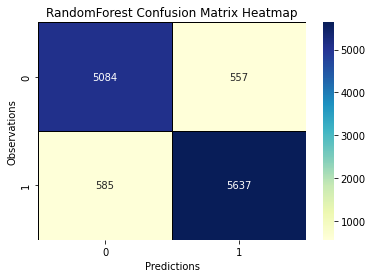

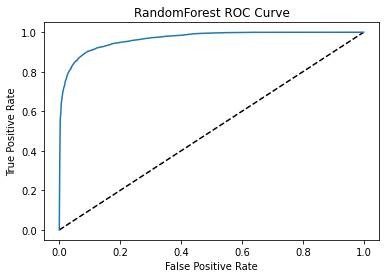

RandomForest Test Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      5641
         1.0       0.91      0.91      0.91      6222

    accuracy                           0.90     11863
   macro avg       0.90      0.90      0.90     11863
weighted avg       0.90      0.90      0.90     11863



In [76]:
Comparison.modelReportClass('RandomForest', rf, X_train, y_train, X_test, y_test, classReport=True)

------------RandomForest------------

---------Train Metrics-----------
Accuracy = 0.9905370089360984
Sensibility = 0.9935704239501708
Specificity = 0.9871914195807295
AUC = 0.9987665443373427

Confusion Matrix
[[22274   289]
 [  160 24725]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.9037342999241339
Sensibility = 0.9059787849566056
Specificity = 0.9012586420847367
AUC = 0.966574821767731

Confusion Matrix
[[5084  557]
 [ 585 5637]]


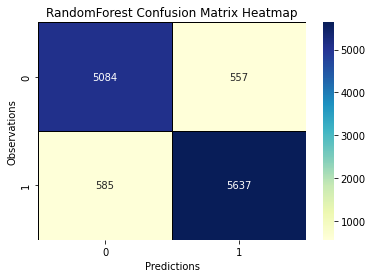

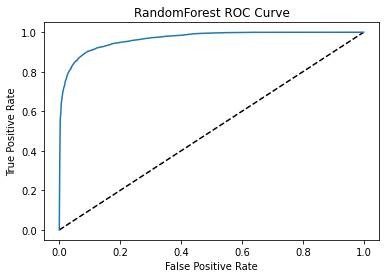

RandomForest Test Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      5641
         1.0       0.91      0.91      0.91      6222

    accuracy                           0.90     11863
   macro avg       0.90      0.90      0.90     11863
weighted avg       0.90      0.90      0.90     11863



In [77]:
Comparison.modelReportClass('RandomForest', rf, X_train, y_train, X_test, y_test, classReport=True)

------------SVM------------

---------Train Metrics-----------
Accuracy = 0.7494731074017872
Sensibility = 0.761261804299779
Specificity = 0.7364712139343172
Confusion Matrix
[[16617  5946]
 [ 5941 18944]]
-----------------------------------


-----------Test Metrics-----------
Accuracy = 0.7439096349995785
Sensibility = 0.7573127611700418
Specificity = 0.7291260414820068
Confusion Matrix
[[4113 1528]
 [1510 4712]]


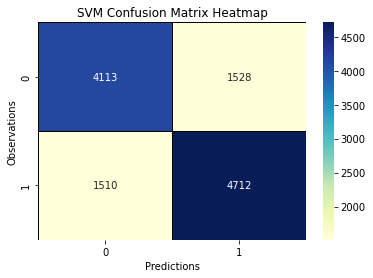

SVM Test Classification Report
              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      5641
         1.0       0.76      0.76      0.76      6222

    accuracy                           0.74     11863
   macro avg       0.74      0.74      0.74     11863
weighted avg       0.74      0.74      0.74     11863



In [78]:
Comparison.modelReportClass('SVM', svm, X_train, y_train, X_test, y_test, ROC = False, classReport=True, probas=False)